# 확률분포의 추정

* 데이터는 0 또는 1 뿐이다. → 베르누이분포

* 데이터는 카테고리 값이어야 한다. → 카테고리분포

* 데이터는 0과 1 사이의 실수 값이어야 한다. → 베타분포

* 데이터는 항상 0 또는 양수이어야 한다. → 로그정규분포, 감마분포, F분포, 카이제곱분포, 지수분포, 하프코시분포 등

* 데이터가 크기 제한이 없는 실수다. → 정규분포 또는 스튜던트 t분포, 코시분포, 라플라스분포 등

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import sklearn

from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


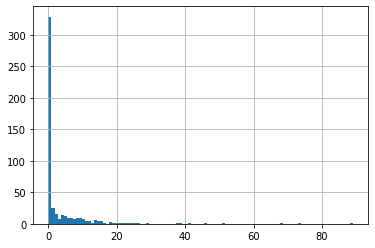

In [4]:
df['CRIM'].hist(bins = 100)    # 지수분포
plt.show()

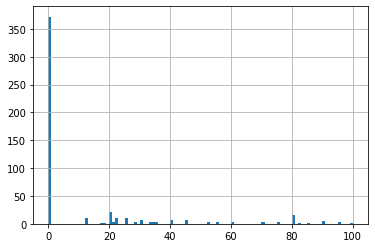

In [5]:
df['ZN'].hist(bins = 100)    # 균일 분포와 닮았으나 0이 다수
plt.show()

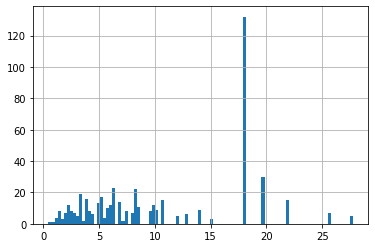

In [6]:
df['INDUS'].hist(bins = 100)    #  복잡한 다봉분포
plt.show()

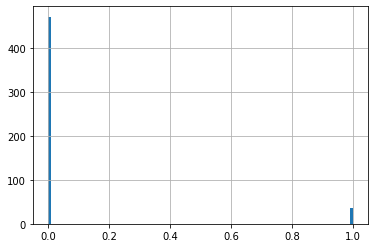

In [7]:
df['CHAS'].hist(bins = 100)    # 베르누이분포
plt.show()

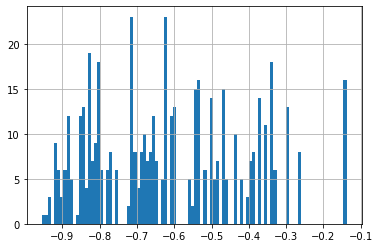

In [9]:
np.log(df['NOX']).hist(bins = 100)    # 로그 정규부포
plt.show()

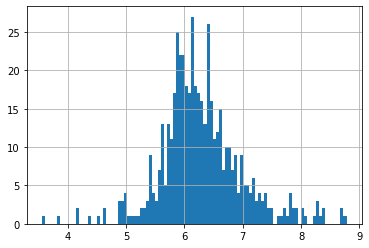

In [10]:
df['RM'].hist(bins = 100)    # 정규분포
plt.show()

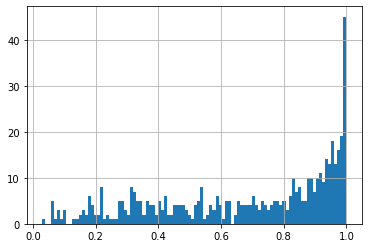

In [13]:
(df['AGE']/100).hist(bins = 100)    # 100으로 나눠 베타분포
plt.show()

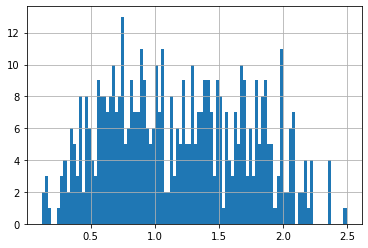

In [15]:
np.log(df['DIS']).hist(bins = 100)    # 로그정규분포
plt.show()

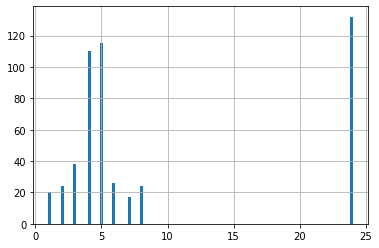

In [16]:
df['RAD'].hist(bins = 100)    # 24를 제외하면 정규분포
plt.show()

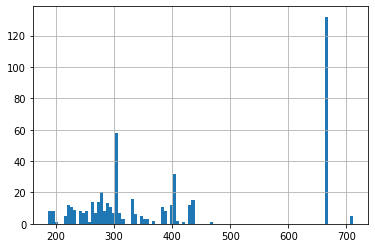

In [17]:
df['TAX'].hist(bins = 100)    # 정규분포와 비슷하나 666, 711 빈도 높음
plt.show()

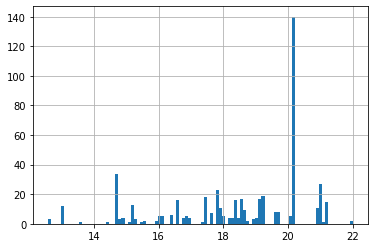

In [18]:
df['PTRATIO'].hist(bins = 100)    # 균일분포와 비슷하나 20.2 빈도 높음
plt.show()

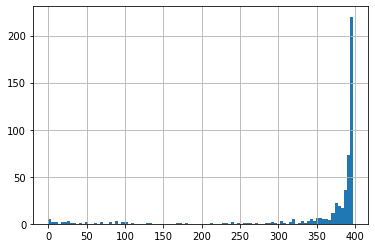

In [21]:
df['B'].hist(bins = 100)    # 정규분포
plt.show()

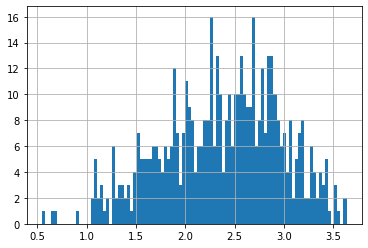

In [22]:
np.log(df['LSTAT']).hist(bins = 100)    # 로그정규분포
plt.show()

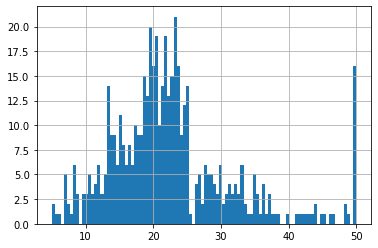

In [23]:
df['MEDV'].hist(bins = 100)    # 로그정규분포와 비슷하나 50 빈도 잦음
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


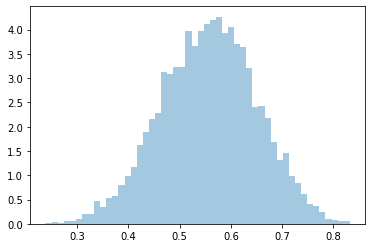

In [24]:
np.random.seed(0)
x = sp.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
#plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()

In [25]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


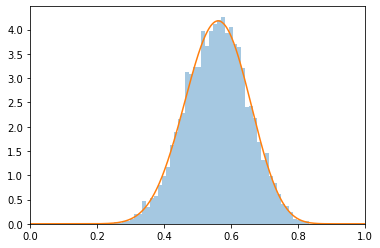

In [26]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0, 1)
#plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


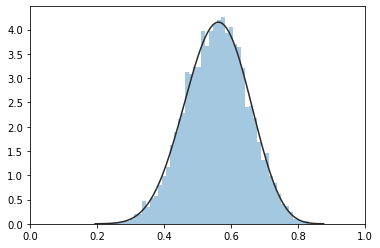

In [27]:
sns.distplot(x, kde=False, norm_hist=True, fit=sp.stats.beta)
plt.xlim(0, 1)
#plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()